In [20]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point

data = pd.read_csv(r'some_posts.txt')
data.head()

,lat,lon,timestamp,userid
0,-24.980792,31.484633,2015-07-07 03:02,66487960
1,-25.499225,31.508906,2015-07-07 03:18,65281761
2,-24.342578,30.930866,2015-03-07 03:38,90916112
3,-24.854614,31.519718,2015-10-07 05:04,37959089
4,-24.921069,31.520836,2015-10-07 05:19,27793716


In [7]:
x = '''
Download the data (Click on the link ==> CNTRL + S)
Read the data into memory using Pandas
Create an empty column called geometry where you will store shapely Point objects
Iterate over the rows of the DataFrame and insert Point objects into column geometry (you need to use .loc indexer to update the row, see materials
Convert that DataFrame into a GeoDataFrame, see hints
Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)
Save the data into a Shapefile called Kruger_posts.shp
Create a simple map of those points using a GIS software or using .plot() -funtion in Python. Save it to GitHub as png file.
'''

In [29]:
# create an empty column for points
data['geometry'] = 0

In [36]:
# iterate over rows to convert lat and lon to Point objects
coords = []
for i in range(len(data)):
    x = data['lat'][i]
    y = data['lon'][i]
    point = Point((x,y))
    data.loc[i,'geometry'] = point

In [41]:
data

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (-24.980792492 31.484633302)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (-25.499224667 31.508905612)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (-24.342578456 30.930866066)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (-24.85461393 31.519718439)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (-24.921068894 31.520835558)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (-24.79954083 31.354468659)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (-25.467991667 30.956033333)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (-25.332223289 30.997408647)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (-25.508851029 31.00553607)


In [46]:
# convert dataframe into geodataframe
# update crs system to 4326
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326", geometry=data['geometry'])
gdf

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (-24.98079 31.48463)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (-25.49922 31.50891)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (-24.34258 30.93087)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (-24.85461 31.51972)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (-24.92107 31.52084)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (-24.79954 31.35447)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (-25.46799 30.95603)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (-25.33222 30.99741)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (-25.50885 31.00554)


<AxesSubplot:>

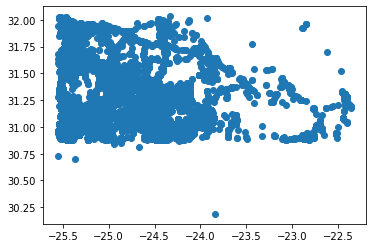

In [48]:
# save to shapefile and plot
gdf.to_file('exercise_points',driver='ESRI Shapefile')
gdf.plot()

## Part 3

In [49]:
t = '''
Reproject the data from WGS84 projection into EPSG:32735 -projection which stands for UTM Zone 35S (UTM zone for South Africa) to transform the data into metric system.
Group the data by userid
Create an empty GeoDataFrame called movements
For each user:
sort the rows by timestamp
create LineString objects based on the points
add the geometry and the userid into the GeoDataFrame you created in the last step
Determine the CRS of the movements GeoDataFrame to EPSG:32735 (epsg code: 32735)
Calculate the lenghts of the lines into a new column called distance in movements GeoDataFrame.
Save the movements of into a Shapefile called Some_movements.shp
Questions
Write your answers below the questions. You should also print in your code the answers to the questions.

What was the shortest distance travelled in meters?
What was the mean distance travelled in meters?
What was the maximum distance travelled in meters?
'''

In [76]:
gdf.head()
user = 65281761

In [95]:
# Reproject the data from WGS84 projection into EPSG:32735 -projection which stands for UTM Zone 35S (UTM zone for South Africa) to transform the data into metric system.
# group data by userid
gdf_metric = gdf.to_crs(epsg=32735)
gdf_metric = gdf_metric.groupby('userid')
gdf_metric

In [57]:
# create empty gdf called movements
movements = gpd.GeoDataFrame()

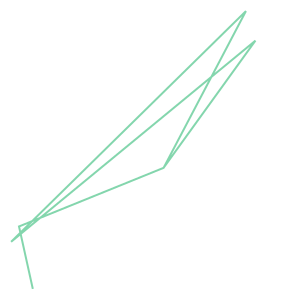

In [94]:
#For each user:
#sort the rows by timestamp
#create LineString objects based on the points
from shapely.geometry import LineString

#test on one group
group1 = gdf_metric.get_group(user)
group1 = group1.sort_values(by='timestamp',ignore_index=True)

#make linestring
    
line= LineString(point for point in group1['geometry'])
line

In [108]:
users = gdf['userid'].drop_duplicates()

In [117]:
#add the geometry and the userid into the GeoDataFrame you created in the last step
for i,userid in enumerate(users):
    group = gdf_metric.get_group(userid)
    group = group.sort_values(by='timestamp',ignore_index=True)
    
    if len(group) > 1:
        line = LineString(point for point in group['geometry'])
    else:
        continue
    
    movements.loc[i,'userid'] = userid
    movements.loc[i,'geometry'] = line

In [118]:
movements

,userid,geometry
6,52431146.0,"LINESTRING (-4761173.367 14931591.745, -479087..."
1,65281761.0,"LINESTRING (-4746165.526 15001552.565, -474893..."
2,90916112.0,"LINESTRING (-4672729.591 14859391.194, -467272..."
3,37959089.0,"LINESTRING (-4686240.069 14974041.654, -468639..."
4,27793716.0,"LINESTRING (-4681879.825 14949377.769, -468971..."
...,...,...
14921,40992775.0,"LINESTRING (-4671453.762 14863353.144, -467145..."
14928,87980026.0,"LINESTRING (-4686477.829 14973965.357, -468615..."
14934,99778679.0,"LINESTRING (-4661400.304 14857095.113, -466073..."
14949,65850367.0,"LINESTRING (-4721003.396 15034710.017, -471291..."


In [126]:
#Determine the CRS of the movements GeoDataFrame to EPSG:32735 (epsg code: 32735)
#Calculate the lenghts of the lines into a new column called distance in movements GeoDataFrame.
#Save the movements of into a Shapefile called Some_movements.shp
movements = movements.to_crs(epsg = 32735)

movements['distance'] = movements['geometry'].length

In [127]:
movements

,userid,geometry,distance
6,52431146.0,"LINESTRING (-4761173.367 14931591.745, -479087...",5.414798e+05
1,65281761.0,"LINESTRING (-4746165.526 15001552.565, -474893...",2.410581e+05
2,90916112.0,"LINESTRING (-4672729.591 14859391.194, -467272...",6.274886e+03
3,37959089.0,"LINESTRING (-4686240.069 14974041.654, -468639...",1.030804e+06
4,27793716.0,"LINESTRING (-4681879.825 14949377.769, -468971...",2.896133e+04
...,...,...,...
14921,40992775.0,"LINESTRING (-4671453.762 14863353.144, -467145...",0.000000e+00
14928,87980026.0,"LINESTRING (-4686477.829 14973965.357, -468615...",1.807680e+03
14934,99778679.0,"LINESTRING (-4661400.304 14857095.113, -466073...",1.172731e+04
14949,65850367.0,"LINESTRING (-4721003.396 15034710.017, -471291...",8.254803e+03


Text(0, 0.5, 'Meters (in millions)')

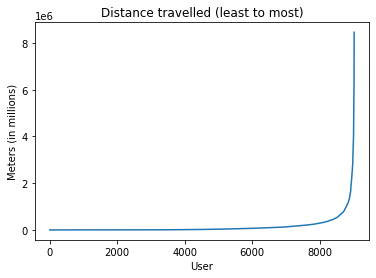

In [154]:
#What was the shortest distance travelled in meters?
#What was the mean distance travelled in meters?
#What was the maximum distance travelled in meters?
import matplotlib.pyplot as plt

movements_low = movements.sort_values(by='distance',ignore_index=True)
movements_low['distance'].plot()
plt.title('Distance travelled (least to most)')
plt.xlabel('User')
plt.ylabel('Meters (in millions)')

<AxesSubplot:>

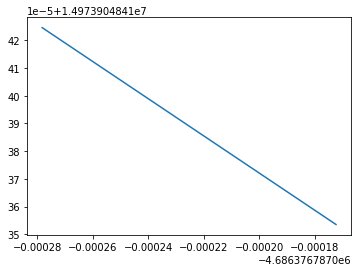

In [178]:
movements_noZ = movements_low[movements_low['distance'] > 0]

movements_noZ[0:1].plot()

In [174]:
import numpy as np

low = float(movements_low[0:1]['distance'])
low = round(low,3)

noZ = float(movements_noZ[0:1]['distance'])
noZ = round(noZ,5)

movements_high = movements.sort_values(by='distance',ignore_index=True,ascending=False)
high = float(movements_high[0:1]['distance'])
high = round(high,3)

avg = np.mean(movements['distance'])
avg = round(avg,3)

## Questions:

In [175]:
print('Shortest Distance travelled (in meters): ',low)
print('Shortest non-zero Distance travelled (in meters): ',noZ)
print('Mean Distance travelled (in meters): ',avg)
print('Maximum Distance travelled (in meters): ',high)

Shortest Distance travelled (in meters):  0.0
Shortest non-zero Distance travelled (in meters):  0.00013
Mean Distance travelled (in meters):  138871.142
Maximum Distance travelled (in meters):  8457917.497
